# 5. 라이브 백테스트! 소형주/저 PBR 투타전략 아직도 먹히나?

[5강의](https://www.youtube.com/watch?v=kCuKbh56A1k) 를 파이썬으로 구현해보겠습니다.

## 설치

Pandas, Numpy가 있어야 합니다. 설치가 안되어있으시면 다음 셀을 실행시키세요.

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy

## 다운로드

[French Database](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)에서 CSV 파일을 다운받으셔서 푸셔야 합니다. 다음 셀을 실행시켜주세요.

In [2]:
! wget http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Global_25_Portfolios_ME_BE-ME_CSV.zip

In [3]:
! unzip Global_25_Portfolios_ME_BE-ME_CSV.zip

## 파일 로딩

파일을 로딩하려고 합니다. 그전에 파일이 어떻게 생겼는지 잠시 살펴보도록 하죠.

In [4]:
! head -30 Global_25_Portfolios_ME_BE-ME.csv

파일에 앞부분이 텍스트로 이루어져 있습니다. 그 후에는 테이블이 3개가 있는데요. 우리는 그 중간에 있는 "Equal Weighted" 부분만 사용할 것입니다.

테이블을 pandas 로 로딩후 첫부분, 끝부분 5라인씩 살펴보죠.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
filepath = 'Global_25_Portfolios_ME_BE-ME.csv'
df = pd.read_csv(filepath, skiprows=367, skipfooter=758, index_col=0, engine='python')
df.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
,,,,,,,,,,,,,,,,,,,,,
199007,0.72,1.93,1.82,2.41,0.97,1.77,1.12,2.29,0.76,1.07,...,3.06,3.10,2.52,2.60,2.98,2.55,1.61,1.78,2.69,1.80
199008,-9.21,-10.07,-7.89,-7.53,-7.12,-11.94,-10.65,-11.57,-11.39,-10.14,...,-11.78,-11.68,-11.65,-12.16,-12.37,-10.51,-10.72,-11.08,-11.15,-11.07
199009,-9.89,-8.48,-9.13,-6.34,-7.52,-10.99,-10.84,-9.47,-9.12,-9.45,...,-12.69,-11.53,-11.62,-13.03,-13.51,-12.17,-12.23,-11.74,-12.86,-13.61
199010,-1.41,-1.34,-0.56,-2.06,-3.94,5.89,1.54,1.83,2.11,0.65,...,12.04,8.90,11.03,10.91,9.97,10.60,13.84,11.34,9.56,9.74
199011,-0.58,-1.43,-0.19,0.05,-0.49,-0.50,1.05,0.50,0.75,0.73,...,-3.92,-3.69,-3.80,-5.03,-4.56,-2.28,-3.55,-2.76,-1.35,-2.49


In [7]:
df.tail()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
,,,,,,,,,,,,,,,,,,,,,
201808,0.10,-1.47,-1.18,-0.85,-1.29,1.58,1.98,0.64,-0.05,-0.54,...,3.28,2.33,0.04,-0.74,-1.35,3.32,0.82,-0.94,-0.71,-2.09
201809,0.84,-0.52,-1.04,-0.26,-0.47,-0.68,-0.94,-1.51,-1.47,-0.34,...,-1.38,-0.66,-0.28,-0.15,0.96,-0.11,0.54,0.83,0.94,1.08
201810,-10.16,-9.29,-10.01,-8.85,-7.44,-12.37,-9.86,-10.66,-10.10,-9.18,...,-10.37,-10.50,-9.57,-7.22,-8.59,-9.74,-8.05,-7.98,-7.38,-7.82
201811,-0.18,-0.14,-0.61,-1.34,-1.04,2.75,2.18,-0.38,0.46,-0.63,...,1.12,1.42,0.38,-0.03,0.59,1.51,1.92,1.68,0.04,0.54
201812,-8.94,-8.25,-8.18,-6.78,-5.86,-10.85,-8.09,-8.29,-8.65,-7.62,...,-8.01,-7.60,-7.64,-7.04,-8.90,-6.59,-7.13,-6.26,-6.95,-7.81


## 분석함수

analyze() 함수가 강환국님이 라이브 백테스팅 한 내용들이 모두 들어가 있는 함수입니다.

In [8]:
def print_df(df):
    from IPython.core.display import HTML
    display(HTML(df.to_html()))

In [9]:
def analyze(df):
    df = (df / 100) + 1
    df = df.cumprod()
    print('이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.')
    print_df(df.tail())
    
    df_cumprod = df
    
    df = df[-1:].pow((1.0 / df.shape[0] * 12), axis=1)
    df = (df - 1) * 100
    df = pd.DataFrame(np.vstack(np.split(df, 5, axis=1)),
                      columns=['HighPBR', '2', '3', '4', 'LowPBR'],
                      index=['SmallMB', '2', '3', '4', 'LargeMB'])

    df['LowPBR-HighPBR'] = df['LowPBR'] - df['HighPBR']
    df['Average'] = df.mean(numeric_only=True, axis=1)
    df.loc['SmallMB - LargeMB'] = df.loc['SmallMB'] - df.loc['LargeMB']
    print('위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다.')
    print('분석을 2열, 1행 추가했습니다. LowPBR-HighPBR 은 저PBR 이 얼마나 좋은지, Average 는 PBR 열들의 평균, SmallMB - LargeMB 는 소형주가 얼마나 좋은지를 보여줍니다.')
    print_df(df)
    
    df_cumprod[['SMALL LoBM', 'SMALL HiBM', 'BIG LoBM', 'BIG HiBM']].plot(figsize=(20, 10))
    print('마지막으로 누적 수익률을 차트로 보시죠.')

## 분석

### 1990 년부터 2018년까지 테스트

이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
,,,,,,,,,,,,,,,,,,,,,,,,,
201808,3.989304,9.641993,16.448153,23.723912,136.893765,2.090067,5.696928,9.148903,12.879618,17.749796,3.123066,5.511444,9.875574,11.085917,16.355632,6.413594,9.274903,10.420990,11.608412,11.894781,5.153785,11.347407,10.267427,10.458637,12.477644
201809,4.022814,9.591855,16.277092,23.662230,136.250364,2.075855,5.643377,9.010755,12.690288,17.689447,3.063103,5.515853,9.793606,11.010533,16.200254,6.325086,9.213688,10.391812,11.591000,12.008971,5.148116,11.408683,10.352647,10.556948,12.612402
201810,3.614096,8.700772,14.647755,21.568123,126.113337,1.819072,5.086940,8.050208,11.408569,16.065556,2.703188,4.893113,8.803473,9.999766,14.839432,5.669175,8.246251,9.397315,10.754130,10.977400,4.646689,10.490284,9.526505,9.777846,11.626112
201811,3.607590,8.688591,14.558404,21.279110,124.801759,1.869096,5.197835,8.019617,11.461048,15.964343,2.730490,5.010059,8.904713,10.088764,14.832013,5.732670,8.363348,9.433025,10.750903,11.042167,4.716854,10.691698,9.686551,9.781757,11.688893
201812,3.285072,7.971782,13.367526,19.836386,117.488376,1.666299,4.777331,7.354791,10.469668,14.747860,2.504133,4.560656,8.020475,9.299823,13.599472,5.273483,7.727733,8.712342,9.994040,10.059414,4.406013,9.929380,9.080173,9.101925,10.775991


위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다.
분석을 2열, 1행 추가했습니다. LowPBR-HighPBR 은 저PBR 이 얼마나 좋은지, Average 는 PBR 열들의 평균, SmallMB - LargeMB 는 소형주가 얼마나 좋은지를 보여줍니다.


,HighPBR,2,3,4,LowPBR,LowPBR-HighPBR,Average
SmallMB,4.261599,7.555723,9.524319,11.051647,18.203790,13.942190,10.756545
2,1.807742,5.640650,7.252143,8.589321,9.902617,8.094875,6.881225
3,3.273282,5.468742,7.578707,8.138805,9.590448,6.317167,6.727858
4,6.007540,7.438447,7.891490,8.412319,8.437124,2.429584,6.769417
LargeMB,5.341161,8.387631,8.048150,8.057222,8.699255,3.358095,6.981919
SmallMB - LargeMB,-1.079561,-0.831908,1.476169,2.994425,9.504534,10.584096,3.774626


마지막으로 누적 수익률을 차트로 보시죠.


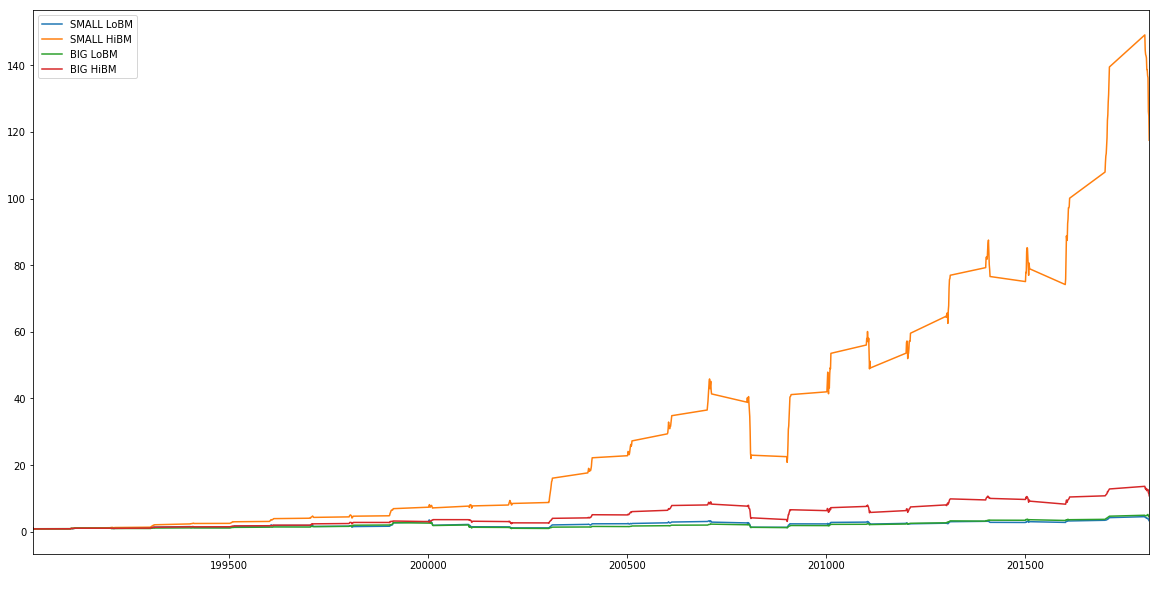

In [10]:
analyze(df)

동영상의 결과와 비슷합니다. 단, 여기서는 2018년 12월까지 2개월을 더 보여주기 때문에 소형주, 저PBR의 수익률이 126에서 117로 낮아졌습니다. (2018년 10월~12월에 엄청 떨어졌죠.)

두번째 테이블을 보시죠. 분석해주신 것처럼, 소형주, 저PBR 이 복리 18 퍼센트로 가장 좋습니다. 소형주, 고PBR 과 비해서 13.9퍼센트나 좋네요. 같은 PBR 내에서 소형주 대형주 차이도 재미있죠.

### 1990 년부터 2004년까지 테스트

이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
,,,,,,,,,,,,,,,,,,,,,,,,,
200408,1.995239,3.073110,4.574848,6.219077,18.358079,0.847956,1.565321,2.598093,3.660222,4.665329,1.037751,1.597857,2.300444,2.857808,4.442739,1.477187,2.164161,2.460988,3.162543,3.956254,1.369177,2.937272,2.967528,3.661912,4.274678
200409,2.062080,3.199107,4.740457,6.437989,18.868434,0.880009,1.636074,2.697859,3.789428,4.788960,1.068883,1.664967,2.406724,2.961832,4.568913,1.528741,2.223459,2.542447,3.284301,4.076920,1.401764,3.019222,3.051213,3.767009,4.427284
200410,2.125592,3.323553,4.891678,6.718685,19.642040,0.904649,1.706098,2.788507,3.927363,4.908205,1.104691,1.748382,2.470021,3.011887,4.673541,1.585304,2.295499,2.611093,3.355899,4.192704,1.437368,3.107988,3.168684,3.916182,4.565858
200411,2.301804,3.626993,5.272739,7.221243,21.195725,0.983082,1.825013,3.011867,4.238803,5.283683,1.176275,1.879686,2.647121,3.246815,5.059108,1.697860,2.432311,2.800920,3.620679,4.511769,1.510674,3.274265,3.349933,4.177000,4.881815
200412,2.370167,3.727461,5.441467,7.515147,22.183446,1.018768,1.898013,3.121198,4.402420,5.547339,1.219797,1.962392,2.755124,3.366297,5.288791,1.779697,2.553197,2.933403,3.773472,4.727883,1.581525,3.392793,3.494650,4.329460,5.094662


위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다.
분석을 2열, 1행 추가했습니다. LowPBR-HighPBR 은 저PBR 이 얼마나 좋은지, Average 는 PBR 열들의 평균, SmallMB - LargeMB 는 소형주가 얼마나 좋은지를 보여줍니다.


,HighPBR,2,3,4,LowPBR,LowPBR-HighPBR,Average
SmallMB,6.132116,9.498406,12.392941,14.923669,23.831059,17.698943,14.079522
2,0.128317,4.518471,8.166087,10.762441,12.542404,12.414087,8.088634
3,1.379670,4.759187,7.239446,8.731491,12.172565,10.792895,7.512542
4,4.055551,6.677978,7.704174,9.591090,11.308604,7.253054,7.765075
LargeMB,3.211806,8.790298,9.012455,10.634858,11.883638,8.671832,8.700815
SmallMB - LargeMB,2.920310,0.708109,3.380486,4.288811,11.947421,9.027111,5.378708


마지막으로 누적 수익률을 차트로 보시죠.


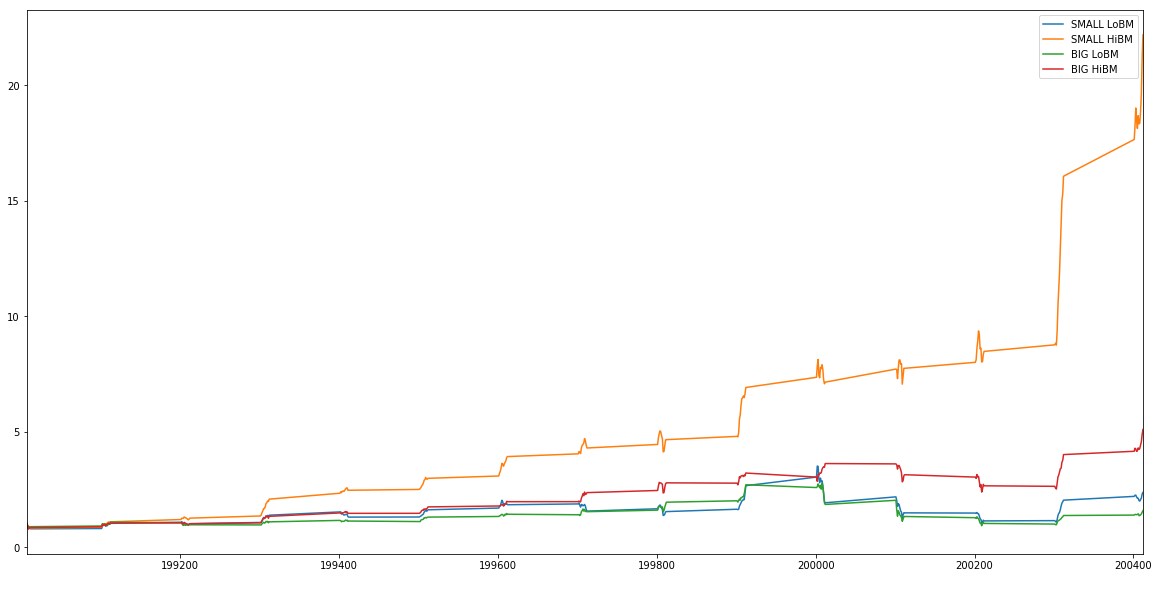

In [11]:
analyze(df.loc['199007':'200412'])

두번째 테이블을 보시면 역시나 값이 비슷한 트렌드를 보여줍니다. 전략이 잘 먹히죠. y축의 단위가 약간 줄긴 했지만 그렇게 나쁘지는 않습니다.

## 2004 년부터 2018 년까지 테스트

이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
,,,,,,,,,,,,,,,,,,,,,,,,,
201808,1.960191,3.287086,3.749355,4.007925,8.522966,2.413224,3.748755,3.774034,3.732312,4.230493,2.995683,3.528465,4.572429,4.110640,4.027387,4.327446,4.400566,4.300047,3.889965,3.260494,3.760126,3.896858,3.643846,2.965928,3.112468
201809,1.976656,3.269993,3.710361,3.997504,8.482908,2.396814,3.713517,3.717046,3.677447,4.216110,2.938166,3.531288,4.534477,4.082687,3.989127,4.267727,4.371523,4.288007,3.884130,3.291795,3.755989,3.917901,3.674090,2.993807,3.146083
201810,1.775828,2.966211,3.338954,3.643725,7.851780,2.100328,3.347364,3.320809,3.306025,3.829071,2.592932,3.132605,4.076042,3.707897,3.654041,3.825164,3.912513,3.877644,3.603696,3.009029,3.390156,3.602510,3.380897,2.772864,2.900059
201811,1.772632,2.962058,3.318587,3.594899,7.770121,2.158087,3.420337,3.308190,3.321233,3.804948,2.619120,3.207475,4.122916,3.740897,3.652214,3.868006,3.968071,3.892379,3.602614,3.026783,3.441347,3.671678,3.437696,2.773973,2.915719
201812,1.614158,2.717688,3.047126,3.351165,7.314792,1.923935,3.143631,3.033941,3.033946,3.515011,2.401995,2.919764,3.713511,3.448359,3.348715,3.558178,3.666497,3.595002,3.348990,2.757399,3.214563,3.409887,3.222496,2.581182,2.688002


위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다.
분석을 2열, 1행 추가했습니다. LowPBR-HighPBR 은 저PBR 이 얼마나 좋은지, Average 는 PBR 열들의 평균, SmallMB - LargeMB 는 소형주가 얼마나 좋은지를 보여줍니다.


,HighPBR,2,3,4,LowPBR,LowPBR-HighPBR,Average
SmallMB,3.243585,6.892354,7.710828,8.395950,14.186160,10.942575,8.561908
2,4.459039,7.934953,7.679692,7.679705,8.741448,4.282409,6.796208
3,6.016015,7.404675,9.140426,8.602752,8.390664,2.374649,6.988197
4,8.829971,9.047762,8.904696,8.391259,6.995778,-1.834193,6.722546
LargeMB,8.095627,8.521553,8.113393,6.525745,6.814112,-1.281515,6.131486
SmallMB - LargeMB,-4.852042,-1.629199,-0.402565,1.870205,7.372048,12.224090,2.430423


마지막으로 누적 수익률을 차트로 보시죠.


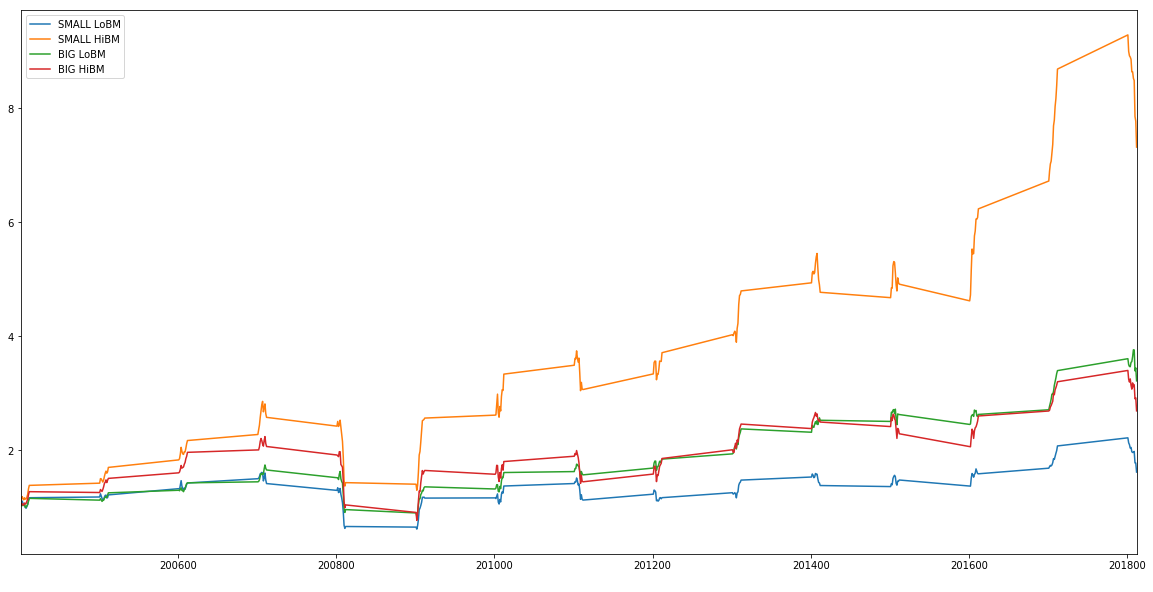

In [12]:
analyze(df.loc['200401':'201812'])

두번째 테이블과 마지막 테이블의 y축을 보세요. PBR에 따른 전략은 그래도 잘 먹지만, 소형주 대형주의 차이가 많이 사라졌습니다.